Importation of the Libraries 

In [2]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
csv_path = "../data/Flight_Price_Dataset_of_Bangladesh.csv"

In [5]:
df = pd.read_csv(csv_path)

In [6]:
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [7]:
df.columns

Index(['Airline', 'Source', 'Source Name', 'Destination', 'Destination Name',
       'Departure Date & Time', 'Arrival Date & Time', 'Duration (hrs)',
       'Stopovers', 'Aircraft Type', 'Class', 'Booking Source',
       'Base Fare (BDT)', 'Tax & Surcharge (BDT)', 'Total Fare (BDT)',
       'Seasonality', 'Days Before Departure'],
      dtype='str')

In [8]:
#Check null values 
print(df.isnull())

       Airline  Source  Source Name  Destination  Destination Name  \
0        False   False        False        False             False   
1        False   False        False        False             False   
2        False   False        False        False             False   
3        False   False        False        False             False   
4        False   False        False        False             False   
...        ...     ...          ...          ...               ...   
56995    False   False        False        False             False   
56996    False   False        False        False             False   
56997    False   False        False        False             False   
56998    False   False        False        False             False   
56999    False   False        False        False             False   

       Departure Date & Time  Arrival Date & Time  Duration (hrs)  Stopovers  \
0                      False                False           False      False   

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Airline                57000 non-null  str    
 1   Source                 57000 non-null  str    
 2   Source Name            57000 non-null  str    
 3   Destination            57000 non-null  str    
 4   Destination Name       57000 non-null  str    
 5   Departure Date & Time  57000 non-null  str    
 6   Arrival Date & Time    57000 non-null  str    
 7   Duration (hrs)         57000 non-null  float64
 8   Stopovers              57000 non-null  str    
 9   Aircraft Type          57000 non-null  str    
 10  Class                  57000 non-null  str    
 11  Booking Source         57000 non-null  str    
 12  Base Fare (BDT)        57000 non-null  float64
 13  Tax & Surcharge (BDT)  57000 non-null  float64
 14  Total Fare (BDT)       57000 non-null  float64
 15  Seasonality  

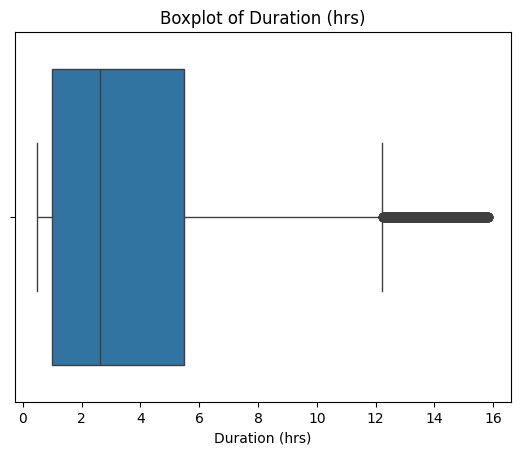

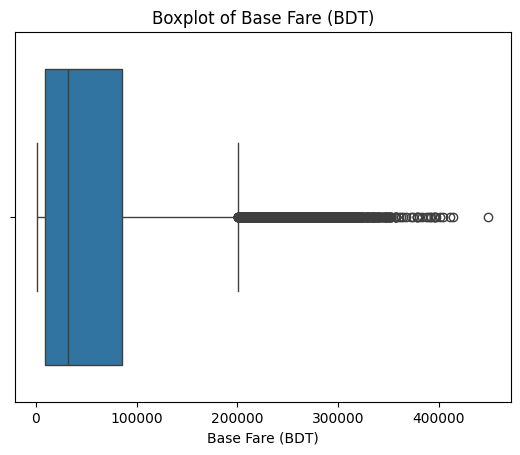

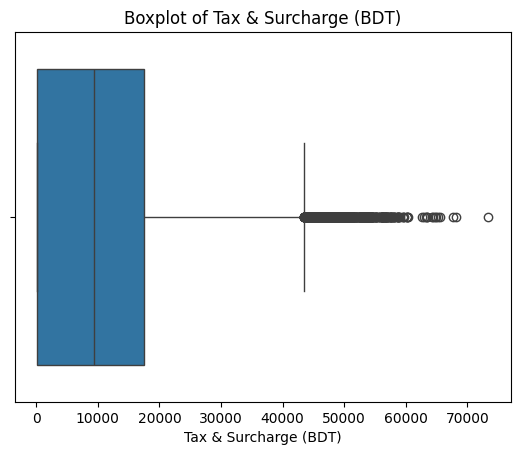

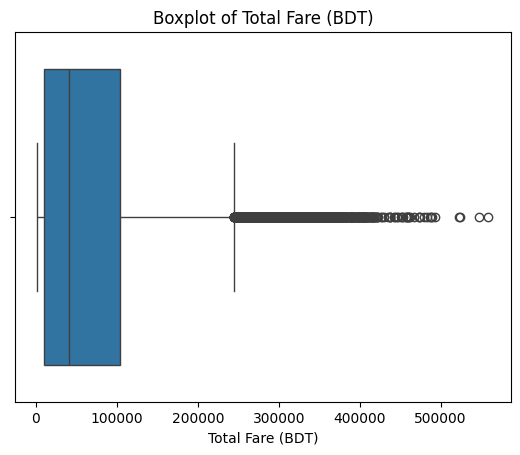

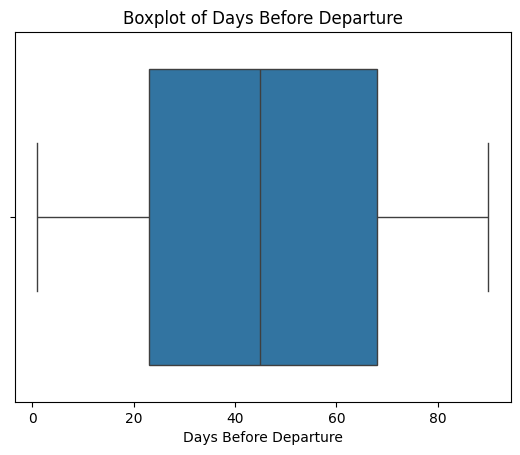

In [10]:
# want to handle outliers, Check for outliers 
numeric_cols = [
    'Duration (hrs)',
    'Base Fare (BDT)',
    'Tax & Surcharge (BDT)',
    'Total Fare (BDT)',
    'Days Before Departure'
]
for col in numeric_cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [11]:
#Statistical Method 
import numpy as np

def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"{column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print("-" * 40)

for col in numeric_cols:
    check_outliers(df, col)


Duration (hrs)
Lower Bound: -5.725793834251249
Upper Bound: 12.219642423535305
Number of Outliers: 5984
----------------------------------------
Base Fare (BDT)
Lower Bound: -106443.60312612615
Upper Bound: 201022.85049769032
Number of Outliers: 3772
----------------------------------------
Tax & Surcharge (BDT)
Lower Bound: -25769.5692393395
Upper Bound: 43482.61539889917
Number of Outliers: 1226
----------------------------------------
Total Fare (BDT)
Lower Bound: -131694.6109767112
Upper Bound: 245098.21772608167
Number of Outliers: 3409
----------------------------------------
Days Before Departure
Lower Bound: -44.5
Upper Bound: 135.5
Number of Outliers: 0
----------------------------------------


In [12]:
#Categorical Columns 
for col in [
    'Airline', 'Source', 'Source Name', 'Destination', 
    'Destination Name', 'Stopovers', 'Aircraft Type', 
    'Class', 'Booking Source', 'Seasonality'
]:
    print(col, ":", df[col].nunique())


Airline : 24
Source : 8
Source Name : 8
Destination : 20
Destination Name : 20
Stopovers : 3
Aircraft Type : 5
Class : 3
Booking Source : 3
Seasonality : 4
